In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import pickle

In [4]:
df=pd.read_csv('/content/drive/MyDrive/data_pred.csv')

In [ ]:
x=df.drop(columns='redemp')

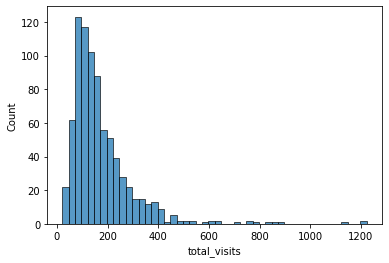

In [ ]:
sns.histplot(df['total_visits'])

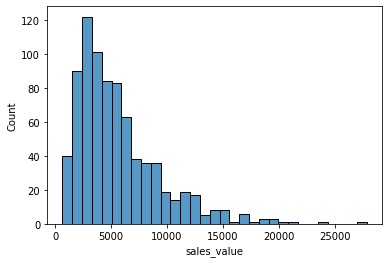

In [ ]:
sns.histplot(df['sales_value'])

In [5]:
x=df.drop(columns='redemp')
y=df['redemp']

In [ ]:
x.shape

(801, 19)

In [ ]:
y.shape

(801,)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=100)

In [170]:
X_train.describe()

,age_desc,income_desc,kid_category_desc,sales_value,total_visits,mar_A,mar_B,mar_U,homeown,probown,probren,homren,homown,1ak,2ak,2a,1f,1m,unknown_hh
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2.463333,3.668333,0.535000,5671.358833,179.571667,0.410000,0.151667,0.438333,0.623333,0.010000,0.015000,0.056667,0.295000,0.056667,0.225000,0.308333,0.188333,0.133333,0.088333
std,1.254836,2.225590,0.948828,3777.630081,132.853911,0.492244,0.358997,0.496597,0.484954,0.099582,0.121654,0.231397,0.456423,0.231397,0.417931,0.462190,0.391304,0.340218,0.284016
min,0.000000,0.000000,0.000000,646.400000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,2964.395000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,0.000000,4692.920000,144.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,5.000000,1.000000,7249.422500,220.250000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,11.000000,3.000000,27859.680000,1223.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [221]:
max=X_train.max()[:5]

In [222]:
min=X_train.min(axis=0)[:5]

In [ ]:
pd.DataFrame(X_train.max()[:5]).to_csv('maxs.csv')
pd.DataFrame(X_train.min(axis=0)[:5]).to_csv('mins.csv')

In [223]:
#Since the numerical data looks like a skewed gaussian distribution, scaling to mean 0 and Sd 0 makes sense

sd=MinMaxScaler()

X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])
#X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [153]:
X_train

,age_desc,income_desc,kid_category_desc,sales_value,total_visits,mar_A,mar_B,mar_U,homeown,probown,probren,homren,homown,1ak,2ak,2a,1f,1m,unknown_hh
254,0.2,0.636364,1.000000,0.308291,0.122586,1,0,0,1,0,0,0,0,1,0,0,0,0,0
198,0.4,0.272727,0.000000,0.000000,0.020991,0,0,1,0,0,0,0,1,0,0,0,0,1,0
645,0.4,0.454545,0.000000,0.072821,0.048699,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.2,0.454545,0.666667,0.460971,0.204030,0,0,1,1,0,0,0,0,0,1,0,0,0,0
660,1.0,0.636364,0.000000,0.084207,0.083963,1,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,0.6,0.272727,0.000000,0.414303,0.153652,0,0,1,1,0,0,0,0,0,0,1,0,0,0
350,0.2,0.545455,0.000000,0.184408,0.165407,0,1,0,0,0,0,0,1,0,0,0,0,1,0
79,0.4,0.272727,0.000000,0.192976,0.082284,1,0,0,0,0,0,0,1,0,0,1,0,0,0
792,0.6,0.454545,0.000000,0.041322,0.042821,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [157]:
X_test

,age_desc,income_desc,kid_category_desc,sales_value,total_visits,mar_A,mar_B,mar_U,homeown,probown,probren,homren,homown,1ak,2ak,2a,1f,1m,unknown_hh
484,1,4,0,3246.92,76,1,0,0,0,1,0,0,0,0,0,0,1,0,0
218,5,4,0,7954.28,168,1,0,0,1,0,0,0,0,0,0,0,0,0,1
589,3,4,0,6651.93,161,0,0,1,1,0,0,0,0,0,0,0,0,0,1
724,3,11,0,16960.59,315,1,0,0,1,0,0,0,0,0,0,1,0,0,0
359,1,3,0,3433.27,55,0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,4,0,0,2019.25,76,1,0,0,1,0,0,0,0,0,0,1,0,0,0
279,2,5,3,11944.57,214,1,0,0,1,0,0,0,0,0,1,0,0,0,0
632,1,4,0,4295.68,67,0,0,1,0,0,0,0,1,0,0,0,0,1,0
534,2,4,0,2017.18,150,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [224]:
X_test['total_visits']=X_test['total_visits'].apply(lambda x: (x-min[4])/(max[4]-min[4]))
X_test['sales_value']=X_test['sales_value'].apply(lambda x: (x-min[3])/(max[3]-min[3]))
X_test['kid_category_desc']=X_test['kid_category_desc'].apply(lambda x: (x-min[2])/(max[2]-min[2]))
X_test['income_desc']=X_test['income_desc'].apply(lambda x: (x-min[1])/(max[1]-min[1]))
X_test['age_desc']=X_test['age_desc'].apply(lambda x: (x-min[0])/(max[0]-min[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [199]:
X_test

,age_desc,income_desc,kid_category_desc,sales_value,total_visits,mar_A,mar_B,mar_U,homeown,probown,probren,homren,homown,1ak,2ak,2a,1f,1m,unknown_hh
484,0.2,0.363636,0.0,0.095561,0.036944,1,0,0,0,1,0,0,0,0,0,0,1,0,0
218,1.0,0.363636,0.0,0.268541,0.114190,1,0,0,1,0,0,0,0,0,0,0,0,0,1
589,0.6,0.363636,0.0,0.220684,0.108312,0,0,1,1,0,0,0,0,0,0,0,0,0,1
724,0.6,1.000000,0.0,0.599494,0.237615,1,0,0,1,0,0,0,0,0,0,1,0,0,0
359,0.2,0.272727,0.0,0.102408,0.019312,0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,0.8,0.000000,0.0,0.050448,0.036944,1,0,0,1,0,0,0,0,0,0,1,0,0,0
279,0.4,0.454545,1.0,0.415171,0.152813,1,0,0,1,0,0,0,0,0,1,0,0,0,0
632,0.2,0.363636,0.0,0.134099,0.029387,0,0,1,0,0,0,0,1,0,0,0,0,1,0
534,0.4,0.363636,0.0,0.050372,0.099076,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [37]:
X_train.mean()[4]

179.57166666666666

In [225]:
#sd=StandardScaler()
#pipeline = Pipeline([('transformera', sd), ('estimator', LogisticRegression())])
estimator__solver = ['newton-cg', 'lbfgs', 'liblinear']
estimator__penalty = ['l2']
estimator__C = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=estimator__solver,penalty=estimator__penalty,C=estimator__C)

In [226]:
grid_search=GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [227]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.645000 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [228]:
mod=LogisticRegression(penalty='l2',C=0.1,solver='liblinear').fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.8571428571428571

In [229]:
pkl_filename = "logisticregression.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)

In [205]:
p_log=precision_score(y_test,ypred)

In [206]:
p_log

0.8571428571428571

In [207]:
accuracy_score(y_test,ypred)

0.5920398009950248

In [208]:
a_log=accuracy_score(y_test,ypred)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=100)

In [73]:
def naturalNumbers(n):
    return [i+1 for i in range(n)]

In [87]:
mod=DecisionTreeClassifier()
criterion=['gini','entropy']
splitter=['best','random']
max_depth=naturalNumbers(10)
min_samples_leaf=naturalNumbers(5)
max_features=['auto','sqrt','None','log2']
grid=dict(criterion=criterion,splitter=splitter,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features)

In [88]:
#cv=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [89]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.685232 using {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 3, 'splitter': 'random'}


In [90]:
mod=DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, max_features= 'log2', min_samples_leaf= 1, splitter= 'random')
mod.fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.7058823529411765

In [91]:
accuracy_score(y_test,ypred)

0.6019900497512438

In [92]:
p_tree=precision_score(y_test,ypred)
a_tree=accuracy_score(y_test,ypred)

In [93]:
pkl_filename = "decisiontree.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)

In [94]:
mod=RandomForestClassifier()
n_estimators = [10,25,50,75,100,200,250]
max_features = ['sqrt', 'log2']
criterion=['gini','entropy']
max_depth=[3,5,7,9]
#min_samples_leaf=naturalNumbers(15)
grid=dict(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features,n_estimators=n_estimators)

In [95]:
#cv=StratifiedKFold(n_splits=4)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [96]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.652670 using {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 10}


In [97]:
mod=RandomForestClassifier(criterion=grid_result.best_params_['criterion'],max_depth=grid_result.best_params_['max_depth'],max_features=grid_result.best_params_['max_features'],\
                           min_samples_leaf=grid_result.best_params_['min_samples_leaf'] , n_estimators=grid_result.best_params_['n_estimators']).fit(X_train,y_train)
mod.fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.5909090909090909

In [98]:
accuracy_score(y_test,ypred)

0.6069651741293532

In [100]:
p_for=precision_score(y_test,ypred)
a_for=accuracy_score(y_test,ypred)

In [101]:
pkl_filename = "randomforest.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)

In [ ]:
#Gradient Boost

In [102]:
mod=GradientBoostingClassifier()
learning_rate = [0, 0.25, 0.5, 0.7, 0.9, 1.0]
max_depth = [3, 7, 9,11]
subsample = [0.5, 0.7, 1.0]
n_estimators = [10,25,50,75,100,150]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

In [103]:
#cv=StratifiedKFold(n_splits=4)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [104]:
print("Best: %f using %s  " % (grid_result.best_score_, grid_result.best_params_))

Best: 0.560724 using {'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}  


In [105]:
mod=GradientBoostingClassifier(learning_rate=grid_result.best_params_['learning_rate'],max_depth=grid_result.best_params_['max_depth'],\
                               n_estimators=grid_result.best_params_['n_estimators'],subsample=grid_result.best_params_['subsample']).fit(X_train,y_train)
mod.fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.611764705882353

In [106]:
p_xg=precision_score(y_test,ypred)
a_xg=accuracy_score(y_test,ypred)

In [107]:
pkl_filename = "gradientboost.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
p=[p_log,p_tree,p_for,p_xg]
a=[a_log,a_tree,a_for,a_xg]
mod=['Log Regression', 'Decision Tree', 'Random Forest','xGBoost']

In [210]:
a

[0.5920398009950248,
 0.6019900497512438,
 0.6069651741293532,
 0.6616915422885572]

In [211]:
p

[0.8571428571428571, 0.7058823529411765, 0.5909090909090909, 0.611764705882353]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


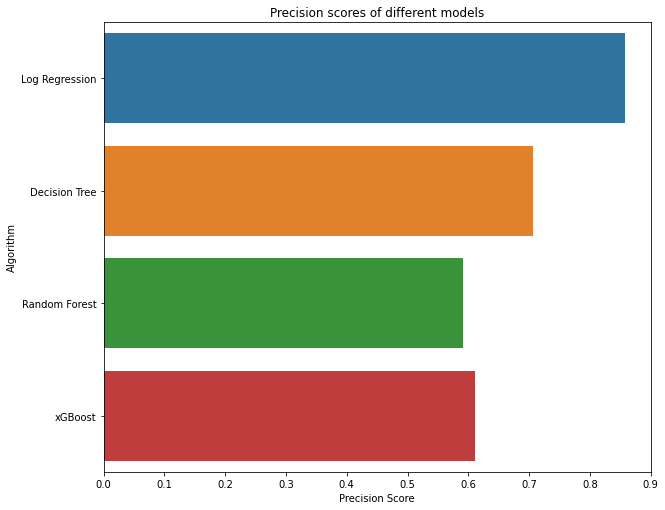

In [212]:
a4_dims = (9.8, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(p,mod,orient='h')
ax.set(xlabel='Precision Score',ylabel='Algorithm')
plt.title('Precision scores of different models')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


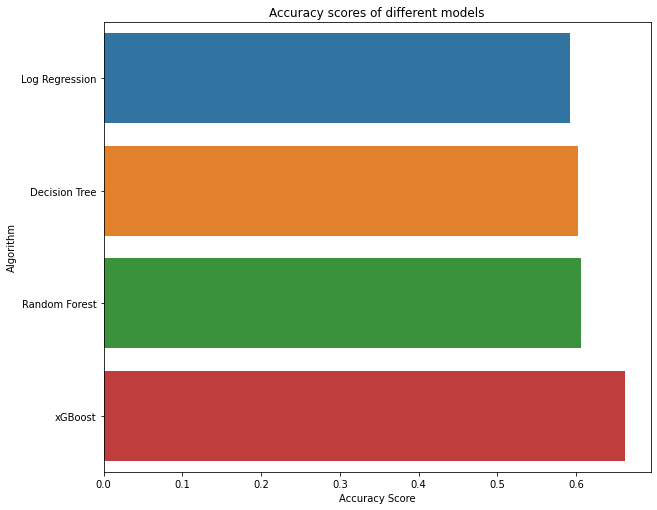

In [213]:
a4_dims = (9.8, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(a,mod,orient='h')
ax.set(xlabel='Accuracy Score',ylabel='Algorithm')
plt.title('Accuracy scores of different models')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=100)
C = [100, 10, 1.0, 0.1, 0.01]
#Since the numerical data looks like a skewed gaussian distribution, scaling to mean 0 and Sd 0 makes sense

sd=MinMaxScaler()

X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])
#X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])


In [ ]:
X_test['total_visits']=X_test['total_visits'].apply(lambda x: (x-min[4])/(max[4]-min[4]))
X_test['sales_value']=X_test['sales_value'].apply(lambda x: (x-min[3])/(max[3]-min[3]))
X_test['kid_category_desc']=X_test['kid_category_desc'].apply(lambda x: (x-min[2])/(max[2]-min[2]))
X_test['income_desc']=X_test['income_desc'].apply(lambda x: (x-min[1])/(max[1]-min[1]))
X_test['age_desc']=X_test['age_desc'].apply(lambda x: (x-min[0])/(max[0]-min[0]))

In [ ]:
p=[]
for i in range(len(C)):
  mod=LogisticRegression(C=C[i]).fit(X_train,y_train)
  mod.fit(X_train,y_train)
  ypred=mod.predict(X_test)
  p.append(precision_score(y_test,ypred))

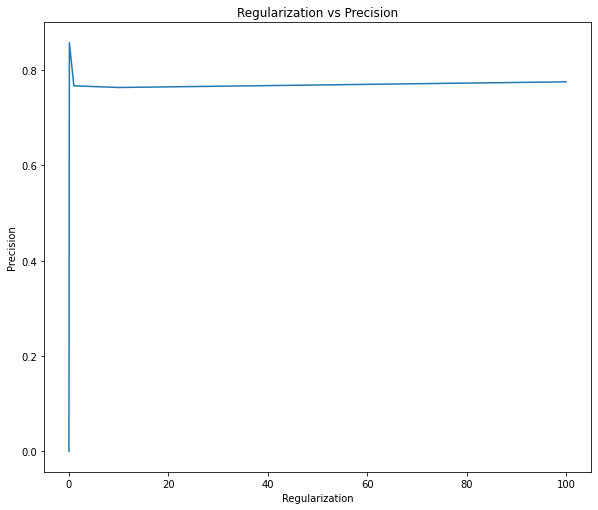

In [217]:
a4_dims = (9.8, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.lineplot(x=C,y=p)
ax.set(xlabel='Regularization',ylabel='Precision')
plt.title('Regularization vs Precision')
plt.show()

In [218]:
a=[]
for i in range(len(C)):
  mod=LogisticRegression(C=C[i]).fit(X_train,y_train)
  mod.fit(X_train,y_train)
  ypred=mod.predict(X_test)
  a.append(accuracy_score(y_test,ypred))

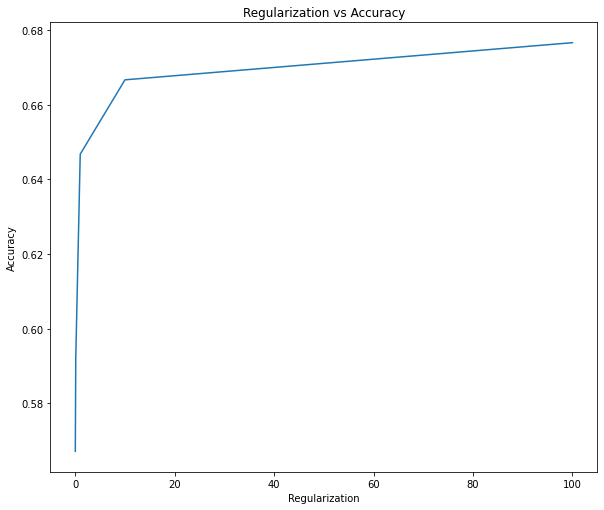

In [219]:
a4_dims = (9.8, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.lineplot(x=C,y=a)
ax.set(xlabel='Regularization',ylabel='Accuracy')
plt.title('Regularization vs Accuracy')
plt.show()